In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import os
import sys
import argparse
import random
from tempfile import gettempdir
import zipfile

import numpy as np
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf

from tensorflow.contrib.tensorboard.plugins import projector
current_path = os.path.dirname(os.path.realpath(sys.argv[0]))


C:\Users\BRG_user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
current_path = os.path.dirname(os.path.realpath(sys.argv[0]))


In [3]:
current_path

'C:\\Users\\BRG_user\\Anaconda3\\lib\\site-packages'

In [4]:
parser = argparse.ArgumentParser()
parser.add_argument(
    '--log_dir',
    type=str,
    default=os.path.join(current_path, 'log'),
    help='The log directory for TensorBoard summaries.')
FLAGS, unparsed = parser.parse_known_args()

In [5]:
FLAGS

Namespace(log_dir='C:\\Users\\BRG_user\\Anaconda3\\lib\\site-packages\\log')

In [6]:
unparsed

['-f',
 'C:\\Users\\BRG_user\\AppData\\Roaming\\jupyter\\runtime\\kernel-5eadc4ee-6649-4220-b22c-33cd083eeb5f.json']

In [7]:
parser

ArgumentParser(prog='ipykernel_launcher.py', usage=None, description=None, formatter_class=<class 'argparse.HelpFormatter'>, conflict_handler='error', add_help=True)

In [8]:
# Create the directory for TensorBoard variables if there is not.
if not os.path.exists(FLAGS.log_dir):
  os.makedirs(FLAGS.log_dir)

In [9]:
# pylint: disable=redefined-outer-name
def maybe_download(filename, expected_bytes):
  """Download a file if not present, and make sure it's the right size."""
  local_filename = os.path.join(gettempdir(), filename)
  if not os.path.exists(local_filename):
    local_filename, _ = urllib.request.urlretrieve(url + filename,
                                                   local_filename)
  statinfo = os.stat(local_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', filename)
  else:
    print(statinfo.st_size)
    raise Exception('Failed to verify ' + local_filename +
                    '. Can you get to it with a browser?')
  return local_filename


filename = maybe_download('text8.zip', 31344016)

Found and verified text8.zip


In [10]:
filename

'C:\\Users\\BRG_user\\AppData\\Local\\Temp\\text8.zip'

In [11]:
# Read the data into a list of strings.
def read_data(filename):
  """Extract the first file enclosed in a zip file as a list of words."""
  with zipfile.ZipFile(filename) as f:
    data = tf.compat.as_str(f.read(f.namelist()[0])).split()
  return data


vocabulary = read_data(filename)
print('Data size', len(vocabulary))

Data size 17005207


In [12]:
vocabulary

['anarchism',
 'originated',
 'as',
 'a',
 'term',
 'of',
 'abuse',
 'first',
 'used',
 'against',
 'early',
 'working',
 'class',
 'radicals',
 'including',
 'the',
 'diggers',
 'of',
 'the',
 'english',
 'revolution',
 'and',
 'the',
 'sans',
 'culottes',
 'of',
 'the',
 'french',
 'revolution',
 'whilst',
 'the',
 'term',
 'is',
 'still',
 'used',
 'in',
 'a',
 'pejorative',
 'way',
 'to',
 'describe',
 'any',
 'act',
 'that',
 'used',
 'violent',
 'means',
 'to',
 'destroy',
 'the',
 'organization',
 'of',
 'society',
 'it',
 'has',
 'also',
 'been',
 'taken',
 'up',
 'as',
 'a',
 'positive',
 'label',
 'by',
 'self',
 'defined',
 'anarchists',
 'the',
 'word',
 'anarchism',
 'is',
 'derived',
 'from',
 'the',
 'greek',
 'without',
 'archons',
 'ruler',
 'chief',
 'king',
 'anarchism',
 'as',
 'a',
 'political',
 'philosophy',
 'is',
 'the',
 'belief',
 'that',
 'rulers',
 'are',
 'unnecessary',
 'and',
 'should',
 'be',
 'abolished',
 'although',
 'there',
 'are',
 'differing',
 '

In [14]:
# Step 2: Build the dictionary and replace rare words with UNK token.
vocabulary_size = 50000

def build_dataset(words, n_words):
  """Process raw inputs into a dataset."""
  count = [['UNK', -1]]
  count.extend(collections.Counter(words).most_common(n_words - 1))
  dictionary = dict()
  for word, _ in count:
    dictionary[word] = len(dictionary)
  data = list()
  unk_count = 0
  i=0
  for word in words:
    index = dictionary.get(word, 0)
    if index == 0:  # dictionary['UNK']
      unk_count += 1
    if i <100 :
        print("word",word,"index",index)
    i=i+1
    data.append(index)
  count[0][1] = unk_count
  reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
  return data, count, dictionary, reversed_dictionary


# Filling 4 global variables:
# data - list of codes (integers from 0 to vocabulary_size-1).
#   This is the original text but words are replaced by their codes
# count - map of words(strings) to count of occurrences
# dictionary - map of words(strings) to their codes(integers)
# reverse_dictionary - maps codes(integers) to words(strings)
data, count, dictionary, reverse_dictionary = build_dataset(
    vocabulary, vocabulary_size)

word anarchism index 5234
word originated index 3081
word as index 12
word a index 6
word term index 195
word of index 2
word abuse index 3134
word first index 46
word used index 59
word against index 156
word early index 128
word working index 742
word class index 477
word radicals index 10572
word including index 134
word the index 1
word diggers index 27350
word of index 2
word the index 1
word english index 103
word revolution index 855
word and index 3
word the index 1
word sans index 15068
word culottes index 0
word of index 2
word the index 1
word french index 151
word revolution index 855
word whilst index 3581
word the index 1
word term index 195
word is index 11
word still index 191
word used index 59
word in index 5
word a index 6
word pejorative index 10713
word way index 215
word to index 7
word describe index 1325
word any index 105
word act index 455
word that index 20
word used index 59
word violent index 2732
word means index 363
word to index 7
word destroy index 3673

In [15]:
print('Data size', len(data))

Data size 17005207


In [16]:
data

[5234,
 3081,
 12,
 6,
 195,
 2,
 3134,
 46,
 59,
 156,
 128,
 742,
 477,
 10572,
 134,
 1,
 27350,
 2,
 1,
 103,
 855,
 3,
 1,
 15068,
 0,
 2,
 1,
 151,
 855,
 3581,
 1,
 195,
 11,
 191,
 59,
 5,
 6,
 10713,
 215,
 7,
 1325,
 105,
 455,
 20,
 59,
 2732,
 363,
 7,
 3673,
 1,
 709,
 2,
 372,
 27,
 41,
 37,
 54,
 540,
 98,
 12,
 6,
 1424,
 2758,
 19,
 568,
 687,
 7089,
 1,
 248,
 5234,
 11,
 1053,
 28,
 1,
 321,
 249,
 44612,
 2878,
 793,
 187,
 5234,
 12,
 6,
 201,
 603,
 11,
 1,
 1135,
 20,
 2622,
 26,
 8984,
 3,
 280,
 32,
 4148,
 142,
 60,
 26,
 6438,
 4187,
 2,
 154,
 33,
 363,
 5234,
 37,
 1138,
 7,
 448,
 345,
 1819,
 20,
 4861,
 1,
 6754,
 2,
 7574,
 1775,
 567,
 1,
 94,
 1,
 248,
 11065,
 12,
 52,
 7089,
 90,
 27,
 271,
 38,
 5949,
 4862,
 20300,
 29,
 0,
 42,
 318,
 6,
 25637,
 528,
 7574,
 372,
 5,
 259,
 2,
 154,
 26,
 1207,
 12,
 7574,
 201,
 1577,
 3,
 15201,
 333,
 1775,
 7089,
 4861,
 345,
 765,
 161,
 407,
 5691,
 756,
 2,
 4106,
 1132,
 4332,
 1537,
 3,
 568,
 8118,
 99

In [17]:
print(count[1])
print(count[2])

('the', 1061396)
('of', 593677)


In [18]:

dictionary['of']
print(dictionary)


{'UNK': 0, 'the': 1, 'of': 2, 'and': 3, 'one': 4, 'in': 5, 'a': 6, 'to': 7, 'zero': 8, 'nine': 9, 'two': 10, 'is': 11, 'as': 12, 'eight': 13, 'for': 14, 's': 15, 'five': 16, 'three': 17, 'was': 18, 'by': 19, 'that': 20, 'four': 21, 'six': 22, 'seven': 23, 'with': 24, 'on': 25, 'are': 26, 'it': 27, 'from': 28, 'or': 29, 'his': 30, 'an': 31, 'be': 32, 'this': 33, 'which': 34, 'at': 35, 'he': 36, 'also': 37, 'not': 38, 'have': 39, 'were': 40, 'has': 41, 'but': 42, 'other': 43, 'their': 44, 'its': 45, 'first': 46, 'they': 47, 'some': 48, 'had': 49, 'all': 50, 'more': 51, 'most': 52, 'can': 53, 'been': 54, 'such': 55, 'many': 56, 'who': 57, 'new': 58, 'used': 59, 'there': 60, 'after': 61, 'when': 62, 'into': 63, 'american': 64, 'time': 65, 'these': 66, 'only': 67, 'see': 68, 'may': 69, 'than': 70, 'world': 71, 'i': 72, 'b': 73, 'would': 74, 'd': 75, 'no': 76, 'however': 77, 'between': 78, 'about': 79, 'over': 80, 'years': 81, 'states': 82, 'people': 83, 'war': 84, 'during': 85, 'united': 86

In [19]:
print(reverse_dictionary[4])
reverse_dictionary

one


{0: 'UNK',
 1: 'the',
 2: 'of',
 3: 'and',
 4: 'one',
 5: 'in',
 6: 'a',
 7: 'to',
 8: 'zero',
 9: 'nine',
 10: 'two',
 11: 'is',
 12: 'as',
 13: 'eight',
 14: 'for',
 15: 's',
 16: 'five',
 17: 'three',
 18: 'was',
 19: 'by',
 20: 'that',
 21: 'four',
 22: 'six',
 23: 'seven',
 24: 'with',
 25: 'on',
 26: 'are',
 27: 'it',
 28: 'from',
 29: 'or',
 30: 'his',
 31: 'an',
 32: 'be',
 33: 'this',
 34: 'which',
 35: 'at',
 36: 'he',
 37: 'also',
 38: 'not',
 39: 'have',
 40: 'were',
 41: 'has',
 42: 'but',
 43: 'other',
 44: 'their',
 45: 'its',
 46: 'first',
 47: 'they',
 48: 'some',
 49: 'had',
 50: 'all',
 51: 'more',
 52: 'most',
 53: 'can',
 54: 'been',
 55: 'such',
 56: 'many',
 57: 'who',
 58: 'new',
 59: 'used',
 60: 'there',
 61: 'after',
 62: 'when',
 63: 'into',
 64: 'american',
 65: 'time',
 66: 'these',
 67: 'only',
 68: 'see',
 69: 'may',
 70: 'than',
 71: 'world',
 72: 'i',
 73: 'b',
 74: 'would',
 75: 'd',
 76: 'no',
 77: 'however',
 78: 'between',
 79: 'about',
 80: 'over'

In [20]:
reverse_dictionary[2]

'of'

In [21]:
del vocabulary  # Hint to reduce memory.
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10], [reverse_dictionary[i] for i in data[:10]])

data_index = 0


Most common words (+UNK) [['UNK', 418391], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]
Sample data [5234, 3081, 12, 6, 195, 2, 3134, 46, 59, 156] ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against']


In [30]:
# Step 3: Function to generate a training batch for the skip-gram model.
batch_size=8
num_skips=2
skip_window=1
global data_index
assert batch_size % num_skips == 0
assert num_skips <= 2 * skip_window
batch = np.ndarray(shape=(batch_size), dtype=np.int32)
labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
span = 3
buffer = collections.deque(maxlen=3)
if data_index + 3 > len(data):
    data_index = 0
buffer.extend(data[data_index:data_index + 3])
data_index += 3
for i in range(batch_size // num_skips):
    context_words = [w for w in range(3) if w != skip_window]
    words_to_use = random.sample(context_words, num_skips)
    for j, context_word in enumerate(words_to_use):
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[context_word]
    if data_index == len(data):
      buffer.extend(data[0:3])
      data_index = 3
    else:
      buffer.append(data[data_index])
      data_index += 1
  # Backtrack a little bit to avoid skipping words in the end of a batch
data_index = (data_index + len(data) - 3) % len(data)
print("batch",batch)
print("labels",labels)

print("***********************************************************")

# Step 3: Function to generate a training batch for the skip-gram model.
batch_size=128
num_skips=2
skip_window=1
global data_index
assert batch_size % num_skips == 0
assert num_skips <= 2 * skip_window
batch = np.ndarray(shape=(batch_size), dtype=np.int32)
labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
span = 3
buffer = collections.deque(maxlen=3)
if data_index + 3 > len(data):
    data_index = 0
buffer.extend(data[data_index:data_index + 3])
data_index += 3
for i in range(batch_size // num_skips):
    context_words = [w for w in range(3) if w != skip_window]
    words_to_use = random.sample(context_words, num_skips)
    for j, context_word in enumerate(words_to_use):
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[context_word]
    if data_index == len(data):
      buffer.extend(data[0:3])
      data_index = 3
    else:
      buffer.append(data[data_index])
      data_index += 1
  # Backtrack a little bit to avoid skipping words in the end of a batch
data_index = (data_index + len(data) - 3) % len(data)
print("batch",batch)
print("labels",labels)
kk=batch

batch [    3     3     1     1 15068 15068     0     0]
labels [[  855]
 [    1]
 [15068]
 [    3]
 [    1]
 [    0]
 [15068]
 [    2]]
***********************************************************
batch [    2     2     1     1   151   151   855   855  3581  3581     1     1
   195   195    11    11   191   191    59    59     5     5     6     6
 10713 10713   215   215     7     7  1325  1325   105   105   455   455
    20    20    59    59  2732  2732   363   363     7     7  3673  3673
     1     1   709   709     2     2   372   372    27    27    41    41
    37    37    54    54   540   540    98    98    12    12     6     6
  1424  1424  2758  2758    19    19   568   568   687   687  7089  7089
     1     1   248   248  5234  5234    11    11  1053  1053    28    28
     1     1   321   321   249   249 44612 44612  2878  2878   793   793
   187   187  5234  5234    12    12     6     6   201   201   603   603
    11    11     1     1  1135  1135    20    20]
labels [[    1]
 [

In [64]:
context_words = [w for w in range(3) if w != skip_window]
print(context_words)
words_to_use = random.sample(context_words, num_skips)
print(words_to_use )
for j, context_word in enumerate(words_to_use):
    print(j)
    print(context_word)

[0, 2]
[0, 2]
0
0
1
2


In [50]:
batch_size=8
num_skips=2
skip_window=1
global data_index
assert batch_size % num_skips == 0
assert num_skips <= 2 * skip_window

In [51]:
for i in range(batch_size // num_skips):
    print('*********************************************************************')
    context_words = [w for w in range(3) if w != skip_window]
    words_to_use = random.sample(context_words, num_skips)
    print(context_words)
    print(words_to_use)
    
    for j, context_word in enumerate(words_to_use):
        print('j',j)
        print('context_word',context_word)

        batch[i * num_skips + j] = buffer[skip_window]
        labels[i * num_skips + j, 0] = buffer[context_word]
    if data_index == len(data):
      buffer.extend(data[0:3])
      data_index = 3
    else:
      buffer.append(data[data_index])
      data_index += 1
  # Backtrack a little bit to avoid skipping words in the end of a batch
data_index = (data_index + len(data) - 3) % len(data)
print('batch',batch)
print(labels)    




*********************************************************************
[0, 2]
[0, 2]
j 0
context_word 0
j 1
context_word 2
*********************************************************************
[0, 2]
[2, 0]
j 0
context_word 2
j 1
context_word 0
*********************************************************************
[0, 2]
[2, 0]
j 0
context_word 2
j 1
context_word 0
*********************************************************************
[0, 2]
[2, 0]
j 0
context_word 2
j 1
context_word 0
batch [   2    2 3134 3134  195  195    2    2]
[[ 195]
 [3134]
 [ 195]
 [   2]
 [   2]
 [3134]
 [3134]
 [ 195]]


In [52]:
# Step 3: Function to generate a training batch for the skip-gram model.
def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
  span = 2 * skip_window + 1  # [ skip_window target skip_window ]
  buffer = collections.deque(maxlen=span)
  if data_index + span > len(data):
    data_index = 0
  buffer.extend(data[data_index:data_index + span])
  data_index += span
  for i in range(batch_size // num_skips):
    context_words = [w for w in range(span) if w != skip_window]
    words_to_use = random.sample(context_words, num_skips)
    for j, context_word in enumerate(words_to_use):
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[context_word]
    if data_index == len(data):
      buffer.extend(data[0:span])
      data_index = span
    else:
      buffer.append(data[data_index])
      data_index += 1
  # Backtrack a little bit to avoid skipping words in the end of a batch
  data_index = (data_index + len(data) - span) % len(data)
  return batch, labels


batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
for i in range(8):
  print(batch[i], reverse_dictionary[batch[i]], '->', labels[i, 0],
        reverse_dictionary[labels[i, 0]])

3134 abuse -> 46 first
3134 abuse -> 2 of
46 first -> 59 used
46 first -> 3134 abuse
59 used -> 46 first
59 used -> 156 against
156 against -> 128 early
156 against -> 59 used


In [26]:

# Step 4: Build and train a skip-gram model.

batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1  # How many words to consider left and right.
num_skips = 2  # How many times to reuse an input to generate a label.
num_sampled = 64  # Number of negative examples to sample.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. These 3 variables are used only for
# displaying model accuracy, they don't affect calculation.
valid_size = 16  # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
valid_examples

array([14, 42, 31, 72,  0, 79, 12, 51, 88, 48, 60, 25, 38, 53, 99, 78])

In [54]:

graph = tf.Graph()

with graph.as_default():

  # Input data.
  with tf.name_scope('inputs'):
    train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

  # Ops and variables pinned to the CPU because of missing GPU implementation
  with tf.device('/cpu:0'):
    # Look up embeddings for inputs.
    with tf.name_scope('embeddings'):
      embeddings = tf.Variable(
          tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
      embed = tf.nn.embedding_lookup(embeddings, train_inputs)

    # Construct the variables for the NCE loss
    with tf.name_scope('weights'):
      nce_weights = tf.Variable(
          tf.truncated_normal(
              [vocabulary_size, embedding_size],
              stddev=1.0 / math.sqrt(embedding_size)))
    with tf.name_scope('biases'):
      nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

  # Compute the average NCE loss for the batch.
  # tf.nce_loss automatically draws a new sample of the negative labels each
  # time we evaluate the loss.
  # Explanation of the meaning of NCE loss:
  #   http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
  with tf.name_scope('loss'):
    loss = tf.reduce_mean(
        tf.nn.nce_loss(
            weights=nce_weights,
            biases=nce_biases,
            labels=train_labels,
            inputs=embed,
            num_sampled=num_sampled,
            num_classes=vocabulary_size))


  # Add the loss value as a scalar to summary.
  tf.summary.scalar('loss', loss)

  # Construct the SGD optimizer using a learning rate of 1.0.
  with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)

  # Compute the cosine similarity between minibatch examples and all embeddings.
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
  normalized_embeddings = embeddings / norm
  valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings,
                                            valid_dataset)
  similarity = tf.matmul(
      valid_embeddings, normalized_embeddings, transpose_b=True)

  # Merge all summaries.
  merged = tf.summary.merge_all()

  # Add variable initializer.
  init = tf.global_variables_initializer()

  # Create a saver.
  saver = tf.train.Saver()


In [35]:
# A random variable
rand_var = tf.random_uniform([5000,5],-1,1, dtype = tf.int32, seed = 0)
train_inputs=tf.placeholder(tf.int32, shape=[5])
embed = tf.nn.embedding_lookup(rand_var, train_inputs)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    kk=[    1  ,   3 ,2 ,5,3  ]
    feed_dict = {train_inputs: kk}
    sess.run(init)
    z1_op = sess.run([embed],feed_dict=feed_dict)

    print(z1_op)
    print(kk)

[array([[-1,  0, -1,  0,  0],
       [-1,  0,  0,  0, -1],
       [ 0, -1,  0, -1,  0],
       [ 0, -1,  0,  0,  0],
       [-1,  0,  0,  0, -1]])]
[1, 3, 2, 5, 3]


In [55]:

# Step 5: Begin training.
num_steps = 100001

with tf.Session(graph=graph) as session:
  # Open a writer to write summaries.
  writer = tf.summary.FileWriter(FLAGS.log_dir, session.graph)

  # We must initialize all variables before we use them.
  init.run()
  print('Initialized')

  average_loss = 0
  for step in xrange(num_steps):
    batch_inputs, batch_labels = generate_batch(batch_size, num_skips,
                                                skip_window)
    feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}

    # Define metadata variable.
    run_metadata = tf.RunMetadata()

    # We perform one update step by evaluating the optimizer op (including it
    # in the list of returned values for session.run()
    # Also, evaluate the merged op to get all summaries from the returned "summary" variable.
    # Feed metadata variable to session for visualizing the graph in TensorBoard.
    _, summary, loss_val = session.run(
        [optimizer, merged, loss],
        feed_dict=feed_dict,
        run_metadata=run_metadata)
    average_loss += loss_val

    # Add returned summaries to writer in each step.
    writer.add_summary(summary, step)
    # Add metadata to visualize the graph for the last run.
    if step == (num_steps - 1):
      writer.add_run_metadata(run_metadata, 'step%d' % step)

    if step % 2000 == 0:
      if step > 0:
        average_loss /= 2000
      # The average loss is an estimate of the loss over the last 2000 batches.
      print('Average loss at step ', step, ': ', average_loss)
      average_loss = 0

    # Note that this is expensive (~20% slowdown if computed every 500 steps)
    if step % 10000 == 0:
      sim = similarity.eval()
      for i in xrange(valid_size):
        valid_word = reverse_dictionary[valid_examples[i]]
        top_k = 8  # number of nearest neighbors
        nearest = (-sim[i, :]).argsort()[1:top_k + 1]
        log_str = 'Nearest to %s:' % valid_word
        for k in xrange(top_k):
          close_word = reverse_dictionary[nearest[k]]
          log_str = '%s %s,' % (log_str, close_word)
        print(log_str)
  final_embeddings = normalized_embeddings.eval()

  # Write corresponding labels for the embeddings.
  with open(FLAGS.log_dir + '/metadata.tsv', 'w') as f:
    for i in xrange(vocabulary_size):
      f.write(reverse_dictionary[i] + '\n')

  # Save the model for checkpoints.
  saver.save(session, os.path.join(FLAGS.log_dir, 'model.ckpt'))

  # Create a configuration for visualizing embeddings with the labels in TensorBoard.
  config = projector.ProjectorConfig()
  embedding_conf = config.embeddings.add()
  embedding_conf.tensor_name = embeddings.name
  embedding_conf.metadata_path = os.path.join(FLAGS.log_dir, 'metadata.tsv')
  projector.visualize_embeddings(writer, config)

writer.close()



Initialized
Average loss at step  0 :  282.27587890625
Nearest to has: neared, maharaja, ridgway, conveys, nicomedia, suburb, plutarch, geraldine,
Nearest to they: millionaires, treatise, hooks, nominates, voices, resonance, classics, civilizations,
Nearest to only: disregard, tracking, allegedly, noriega, kal, unhealthy, spoiler, botvinnik,
Nearest to between: catalysed, dostum, walloon, distorting, remixed, madhuri, roads, sixty,
Nearest to the: wehrmacht, radii, apache, wy, ko, hadrian, megara, gutierrez,
Nearest to would: aruban, saarland, reciprocated, iir, veitch, grave, lustre, fusing,
Nearest to can: mister, iadb, governorship, proprietor, writable, hasn, diagonal, professes,
Nearest to a: independent, landon, astonishingly, pizan, poole, ruminants, concentration, calcite,
Nearest to united: physics, merck, plastic, napster, christiane, malm, nursia, harassing,
Nearest to used: evas, haploid, kayaking, fis, raccoons, dubliners, guarani, heresies,
Nearest to on: racist, uniformi

Average loss at step  52000 :  5.026099646866322
Average loss at step  54000 :  5.222077616095543
Average loss at step  56000 :  5.04462848007679
Average loss at step  58000 :  5.046239396572113
Average loss at step  60000 :  4.937511501193047
Nearest to has: had, was, have, is, significant, amalthea, troll, could,
Nearest to they: he, it, we, there, you, not, who, these,
Nearest to only: allegedly, disregard, unhealthy, lymphoma, agouti, accountants, tested, mishnayot,
Nearest to between: with, from, in, catalysed, microbats, kapoor, adoptive, dostum,
Nearest to the: agouti, their, kapoor, its, dasyprocta, a, michelob, his,
Nearest to would: will, can, could, to, may, should, freezing, protons,
Nearest to can: must, may, will, would, could, diagonal, should, might,
Nearest to a: the, dasyprocta, diarrhoea, amalthea, this, kapoor, another, spassky,
Nearest to united: phi, kriol, circumcised, ursus, napster, vma, ecological, physics,
Nearest to used: written, guarani, arrange, contribut

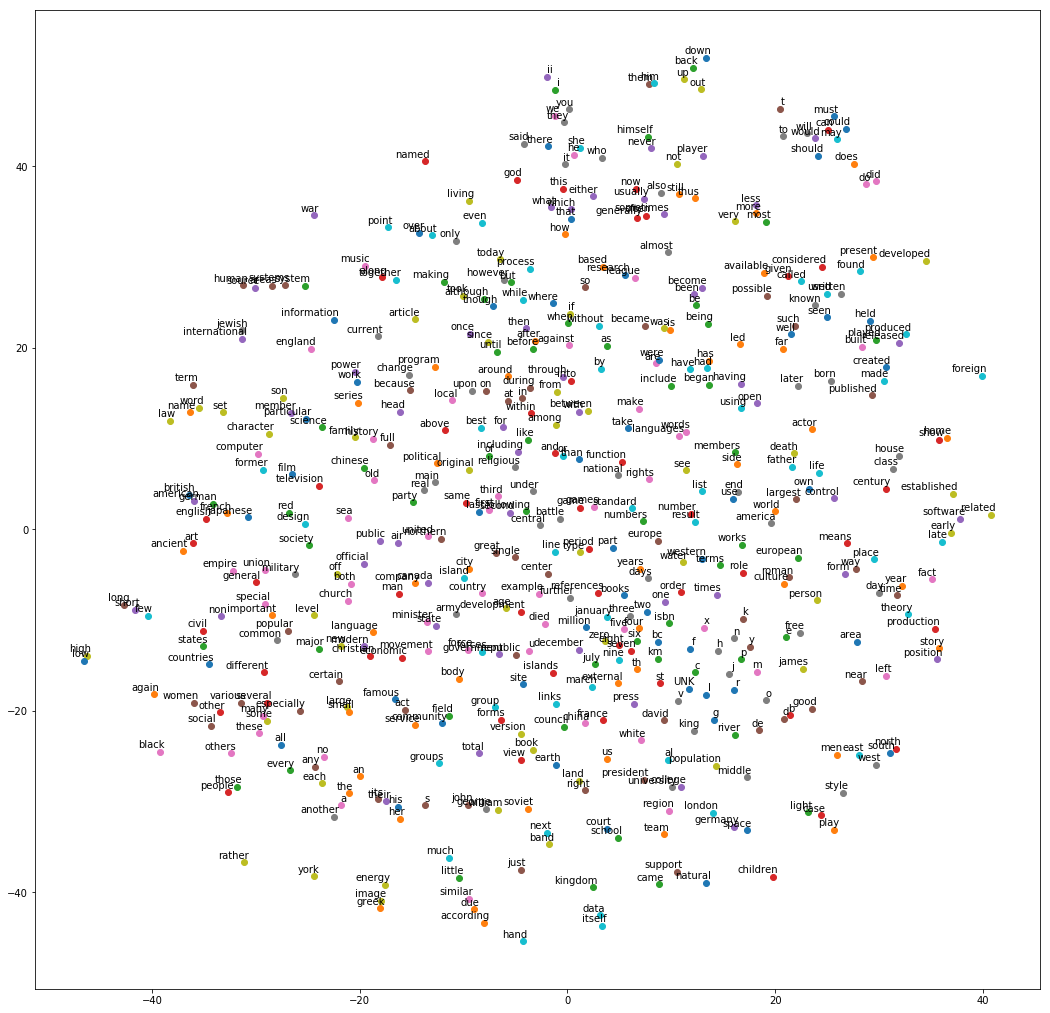

In [56]:
# Step 6: Visualize the embeddings.


# pylint: disable=missing-docstring
# Function to draw visualization of distance between embeddings.
def plot_with_labels(low_dim_embs, labels, filename):
  assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(18, 18))  # in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i, :]
    plt.scatter(x, y)
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')

  plt.savefig(filename)


try:
  # pylint: disable=g-import-not-at-top
  from sklearn.manifold import TSNE
  import matplotlib.pyplot as plt

  tsne = TSNE(
      perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
  plot_only = 500
  low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
  labels = [reverse_dictionary[i] for i in xrange(plot_only)]
  plot_with_labels(low_dim_embs, labels, os.path.join(gettempdir(), 'tsne.png'))

except ImportError as ex:
  print('Please install sklearn, matplotlib, and scipy to show embeddings.')
  print(ex)
